In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Record status (desc),Check status (desc),Age,Address (desc),Incidence date,Topography (desc),Morphology (desc),Behaviour (desc),Basis diagnosis (desc),ICD-10,...,Status (desc),ObsoleteFlagPatientTable,PatientRecordID,PatientUpdatedBy,PatientUpdateDate,PatientRecordStatus,PatientCheckStatus,Civil Status (desc),Date of Death,Cause of Death (desc)
0,Confirmed,Done: OK,42,REGENCIA PARQUE,01/01/1999,Unknown primary site,"Neoplasm, malignant",Malignant,Cytology,C809,...,Dead,0,1999205501,morten,10/05/2011,NaN,NaN,Not single,08/12/1999,Invalid code.
1,Confirmed,Done: OK,46,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Squamous cell carcinoma, NOS",Malignant,Histology of primary,C539,...,Invalid code.,0,1999379701,morten,10/05/2011,NaN,NaN,Invalid code.,NaN,Invalid code.
2,Confirmed,Done: OK,63,CHAC. QUINTA SONHOS,01/01/1999,Soft tissues of lower limb a,Malignant fibrous histiocytoma,Malignant,Histology of primary,C492,...,Invalid code.,0,1999246201,morten,10/05/2011,NaN,NaN,Not single,NaN,Invalid code.
3,Confirmed,Done: OK,72,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Neoplasm, malignant",Malignant,Death Certificate Only,C539,...,Dead,0,1999409601,morten,10/05/2011,NaN,NaN,Invalid code.,04/07/1999,Invalid code.
4,Confirmed,Done: OK,74,Invalid code.,01/01/1999,Rectosigmoid junction,Tubular adenocarcinoma,Malignant,Histology of primary,C199,...,Invalid code.,0,1999298901,morten,10/05/2011,NaN,NaN,Invalid code.,NaN,Invalid code.


In [4]:
#Checking the unique values in each column
print("Unique Values")
unique_cols = df.nunique()
print(unique_cols)

Unique Values
Record status (desc)              1
Check status (desc)               1
Age                             106
Address (desc)                  206
Incidence date                 2700
Topography (desc)               203
Morphology (desc)               284
Behaviour (desc)                  4
Basis diagnosis (desc)            6
ICD-10                          330
Multiple Primary               1245
MP Seq                           21
MP Tot                            2
Update Date                       3
ICCC code                         4
ObsoleteFlagTumourTable           1
TumourID                      21208
PatientIDTumourTable          20253
PatientRecordIDTumourTable    20253
TumourUpdatedBy                   1
TumourUnduplicationStatus         1
Extent (desc)                     6
Laterality (desc)                 1
Registry Number               20253
Person search (desc)              1
First names                    1443
MiddleName                        0
Maiden name   

In [5]:
#We will remove all the columns which only have single unique value because they are not important for our class
#Constant columns should always be removed.
rmv = unique_cols[unique_cols==1]
print(rmv)

Record status (desc)         1
Check status (desc)          1
ObsoleteFlagTumourTable      1
TumourUpdatedBy              1
TumourUnduplicationStatus    1
Laterality (desc)            1
Person search (desc)         1
ObsoleteFlagPatientTable     1
PatientUpdatedBy             1
PatientRecordStatus          1
Cause of Death (desc)        1
dtype: int64


In [6]:
data = df.drop(rmv.index,axis =1)
pd.DataFrame(data).head()

,Age,Address (desc),Incidence date,Topography (desc),Morphology (desc),Behaviour (desc),Basis diagnosis (desc),ICD-10,Multiple Primary,MP Seq,...,Birth date,Race (desc),Occupation (desc),Date last contact,Status (desc),PatientRecordID,PatientUpdateDate,PatientCheckStatus,Civil Status (desc),Date of Death
0,42,REGENCIA PARQUE,01/01/1999,Unknown primary site,"Neoplasm, malignant",Malignant,Cytology,C809,NaN,1,...,04/10/1957,Mulato,Representante comercial autônomo Ocupação,NaN,Dead,1999205501,10/05/2011,NaN,Not single,08/12/1999
1,46,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Squamous cell carcinoma, NOS",Malignant,Histology of primary,C539,NaN,1,...,25/03/1952,Invalid code.,Invalid code.,NaN,Invalid code.,1999379701,10/05/2011,NaN,Invalid code.,NaN
2,63,CHAC. QUINTA SONHOS,01/01/1999,Soft tissues of lower limb a,Malignant fibrous histiocytoma,Malignant,Histology of primary,C492,NaN,1,...,31/07/1936,Mulato,Atendente de balcão,NaN,Invalid code.,1999246201,10/05/2011,NaN,Not single,NaN
3,72,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Neoplasm, malignant",Malignant,Death Certificate Only,C539,NaN,1,...,13/11/1926,Invalid code.,Invalid code.,04/07/1999,Dead,1999409601,10/05/2011,NaN,Invalid code.,04/07/1999
4,74,Invalid code.,01/01/1999,Rectosigmoid junction,Tubular adenocarcinoma,Malignant,Histology of primary,C199,NaN,1,...,27/06/1925,Other,Invalid code.,NaN,Invalid code.,1999298901,10/05/2011,NaN,Invalid code.,NaN


In [7]:
#Checking the missing values in each column
print('Missing Values: ')
missing = data.isna().sum()
print(missing)

Missing Values: 
Age                               0
Address (desc)                    0
Incidence date                    0
Topography (desc)                 0
Morphology (desc)                 0
Behaviour (desc)                  0
Basis diagnosis (desc)            0
ICD-10                            0
Multiple Primary              19008
MP Seq                            0
MP Tot                        21203
Update Date                       0
ICCC code                     21204
TumourID                          0
PatientIDTumourTable              0
PatientRecordIDTumourTable        0
Extent (desc)                     0
Registry Number                   0
First names                       0
MiddleName                    21208
Maiden name                   21208
Family Name                      17
Sex (desc)                        0
Birth date                      810
Race (desc)                       0
Occupation (desc)                 0
Date last contact             11946
Status (des

In [8]:
#Some of the columns have very large number of missing values. We will also remove those columns

rmv_missing = missing[missing>1000]
print(rmv_missing)
final_data = data.drop(rmv_missing.index,axis=1)
final_data.head()

Multiple Primary      19008
MP Tot                21203
ICCC code             21204
MiddleName            21208
Maiden name           21208
Date last contact     11946
PatientCheckStatus    21208
Date of Death         15188
dtype: int64


,Age,Address (desc),Incidence date,Topography (desc),Morphology (desc),Behaviour (desc),Basis diagnosis (desc),ICD-10,MP Seq,Update Date,...,First names,Family Name,Sex (desc),Birth date,Race (desc),Occupation (desc),Status (desc),PatientRecordID,PatientUpdateDate,Civil Status (desc)
0,42,REGENCIA PARQUE,01/01/1999,Unknown primary site,"Neoplasm, malignant",Malignant,Cytology,C809,1,10/05/2011,...,KEZIRON,FILHO,Male,04/10/1957,Mulato,Representante comercial autônomo Ocupação,Dead,1999205501,10/05/2011,Not single
1,46,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Squamous cell carcinoma, NOS",Malignant,Histology of primary,C539,1,10/05/2011,...,ZABETI,OLIVEIRA,Female,25/03/1952,Invalid code.,Invalid code.,Invalid code.,1999379701,10/05/2011,Invalid code.
2,63,CHAC. QUINTA SONHOS,01/01/1999,Soft tissues of lower limb a,Malignant fibrous histiocytoma,Malignant,Histology of primary,C492,1,10/05/2011,...,MORINE,PAULA,Female,31/07/1936,Mulato,Atendente de balcão,Invalid code.,1999246201,10/05/2011,Not single
3,72,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Neoplasm, malignant",Malignant,Death Certificate Only,C539,1,10/05/2011,...,PERUSI,CAPARELLE,Female,13/11/1926,Invalid code.,Invalid code.,Dead,1999409601,10/05/2011,Invalid code.
4,74,Invalid code.,01/01/1999,Rectosigmoid junction,Tubular adenocarcinoma,Malignant,Histology of primary,C199,1,10/05/2011,...,FAITH,ROCHA,Female,27/06/1925,Other,Invalid code.,Invalid code.,1999298901,10/05/2011,Invalid code.


In [9]:
final_data.nunique()

Age                             106
Address (desc)                  206
Incidence date                 2700
Topography (desc)               203
Morphology (desc)               284
Behaviour (desc)                  4
Basis diagnosis (desc)            6
ICD-10                          330
MP Seq                           21
Update Date                       3
TumourID                      21208
PatientIDTumourTable          20253
PatientRecordIDTumourTable    20253
Extent (desc)                     6
Registry Number               20253
First names                    1443
Family Name                    2141
Sex (desc)                        2
Birth date                    13355
Race (desc)                       5
Occupation (desc)               344
Status (desc)                     3
PatientRecordID               20253
PatientUpdateDate                 2
Civil Status (desc)               3
dtype: int64

In [10]:
#We will also remove the id columns as they are redundant

final_data = final_data.drop(['TumourID','PatientIDTumourTable','PatientRecordIDTumourTable','Registry Number','PatientRecordID'],axis =1)
final_data.head()

,Age,Address (desc),Incidence date,Topography (desc),Morphology (desc),Behaviour (desc),Basis diagnosis (desc),ICD-10,MP Seq,Update Date,Extent (desc),First names,Family Name,Sex (desc),Birth date,Race (desc),Occupation (desc),Status (desc),PatientUpdateDate,Civil Status (desc)
0,42,REGENCIA PARQUE,01/01/1999,Unknown primary site,"Neoplasm, malignant",Malignant,Cytology,C809,1,10/05/2011,Metastasis,KEZIRON,FILHO,Male,04/10/1957,Mulato,Representante comercial autônomo Ocupação,Dead,10/05/2011,Not single
1,46,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Squamous cell carcinoma, NOS",Malignant,Histology of primary,C539,1,10/05/2011,Localized,ZABETI,OLIVEIRA,Female,25/03/1952,Invalid code.,Invalid code.,Invalid code.,10/05/2011,Invalid code.
2,63,CHAC. QUINTA SONHOS,01/01/1999,Soft tissues of lower limb a,Malignant fibrous histiocytoma,Malignant,Histology of primary,C492,1,10/05/2011,Localized,MORINE,PAULA,Female,31/07/1936,Mulato,Atendente de balcão,Invalid code.,10/05/2011,Not single
3,72,CHAC. QUINTA SONHOS,01/01/1999,Cervix uteri,"Neoplasm, malignant",Malignant,Death Certificate Only,C539,1,10/05/2011,Unkonwn,PERUSI,CAPARELLE,Female,13/11/1926,Invalid code.,Invalid code.,Dead,10/05/2011,Invalid code.
4,74,Invalid code.,01/01/1999,Rectosigmoid junction,Tubular adenocarcinoma,Malignant,Histology of primary,C199,1,10/05/2011,Regional,FAITH,ROCHA,Female,27/06/1925,Other,Invalid code.,Invalid code.,10/05/2011,Invalid code.


In [11]:
final_data.to_csv('final_data.csv')

In [12]:
#Target Column
print(final_data['Extent (desc)'].value_counts())


Localized        10385
Unkonwn           4669
In situ           2526
Metastasis        1994
Regional          1535
Invalid code.       99
Name: Extent (desc), dtype: int64


In [13]:
final_data.shape

(21208, 20)

In [14]:
#We will convert all the string values to numerical
char_cols = final_data.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    final_data[c] = pd.factorize(final_data[c])[0]

final_data.head()

,Age,Address (desc),Incidence date,Topography (desc),Morphology (desc),Behaviour (desc),Basis diagnosis (desc),ICD-10,MP Seq,Update Date,Extent (desc),First names,Family Name,Sex (desc),Birth date,Race (desc),Occupation (desc),Status (desc),PatientUpdateDate,Civil Status (desc)
0,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,46,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1
2,63,1,0,2,2,0,1,2,1,0,1,2,2,1,2,0,2,1,0,0
3,72,1,0,1,0,0,2,1,1,0,2,3,3,1,3,1,1,0,0,1
4,74,2,0,3,3,0,1,3,1,0,3,4,4,1,4,2,1,1,0,1


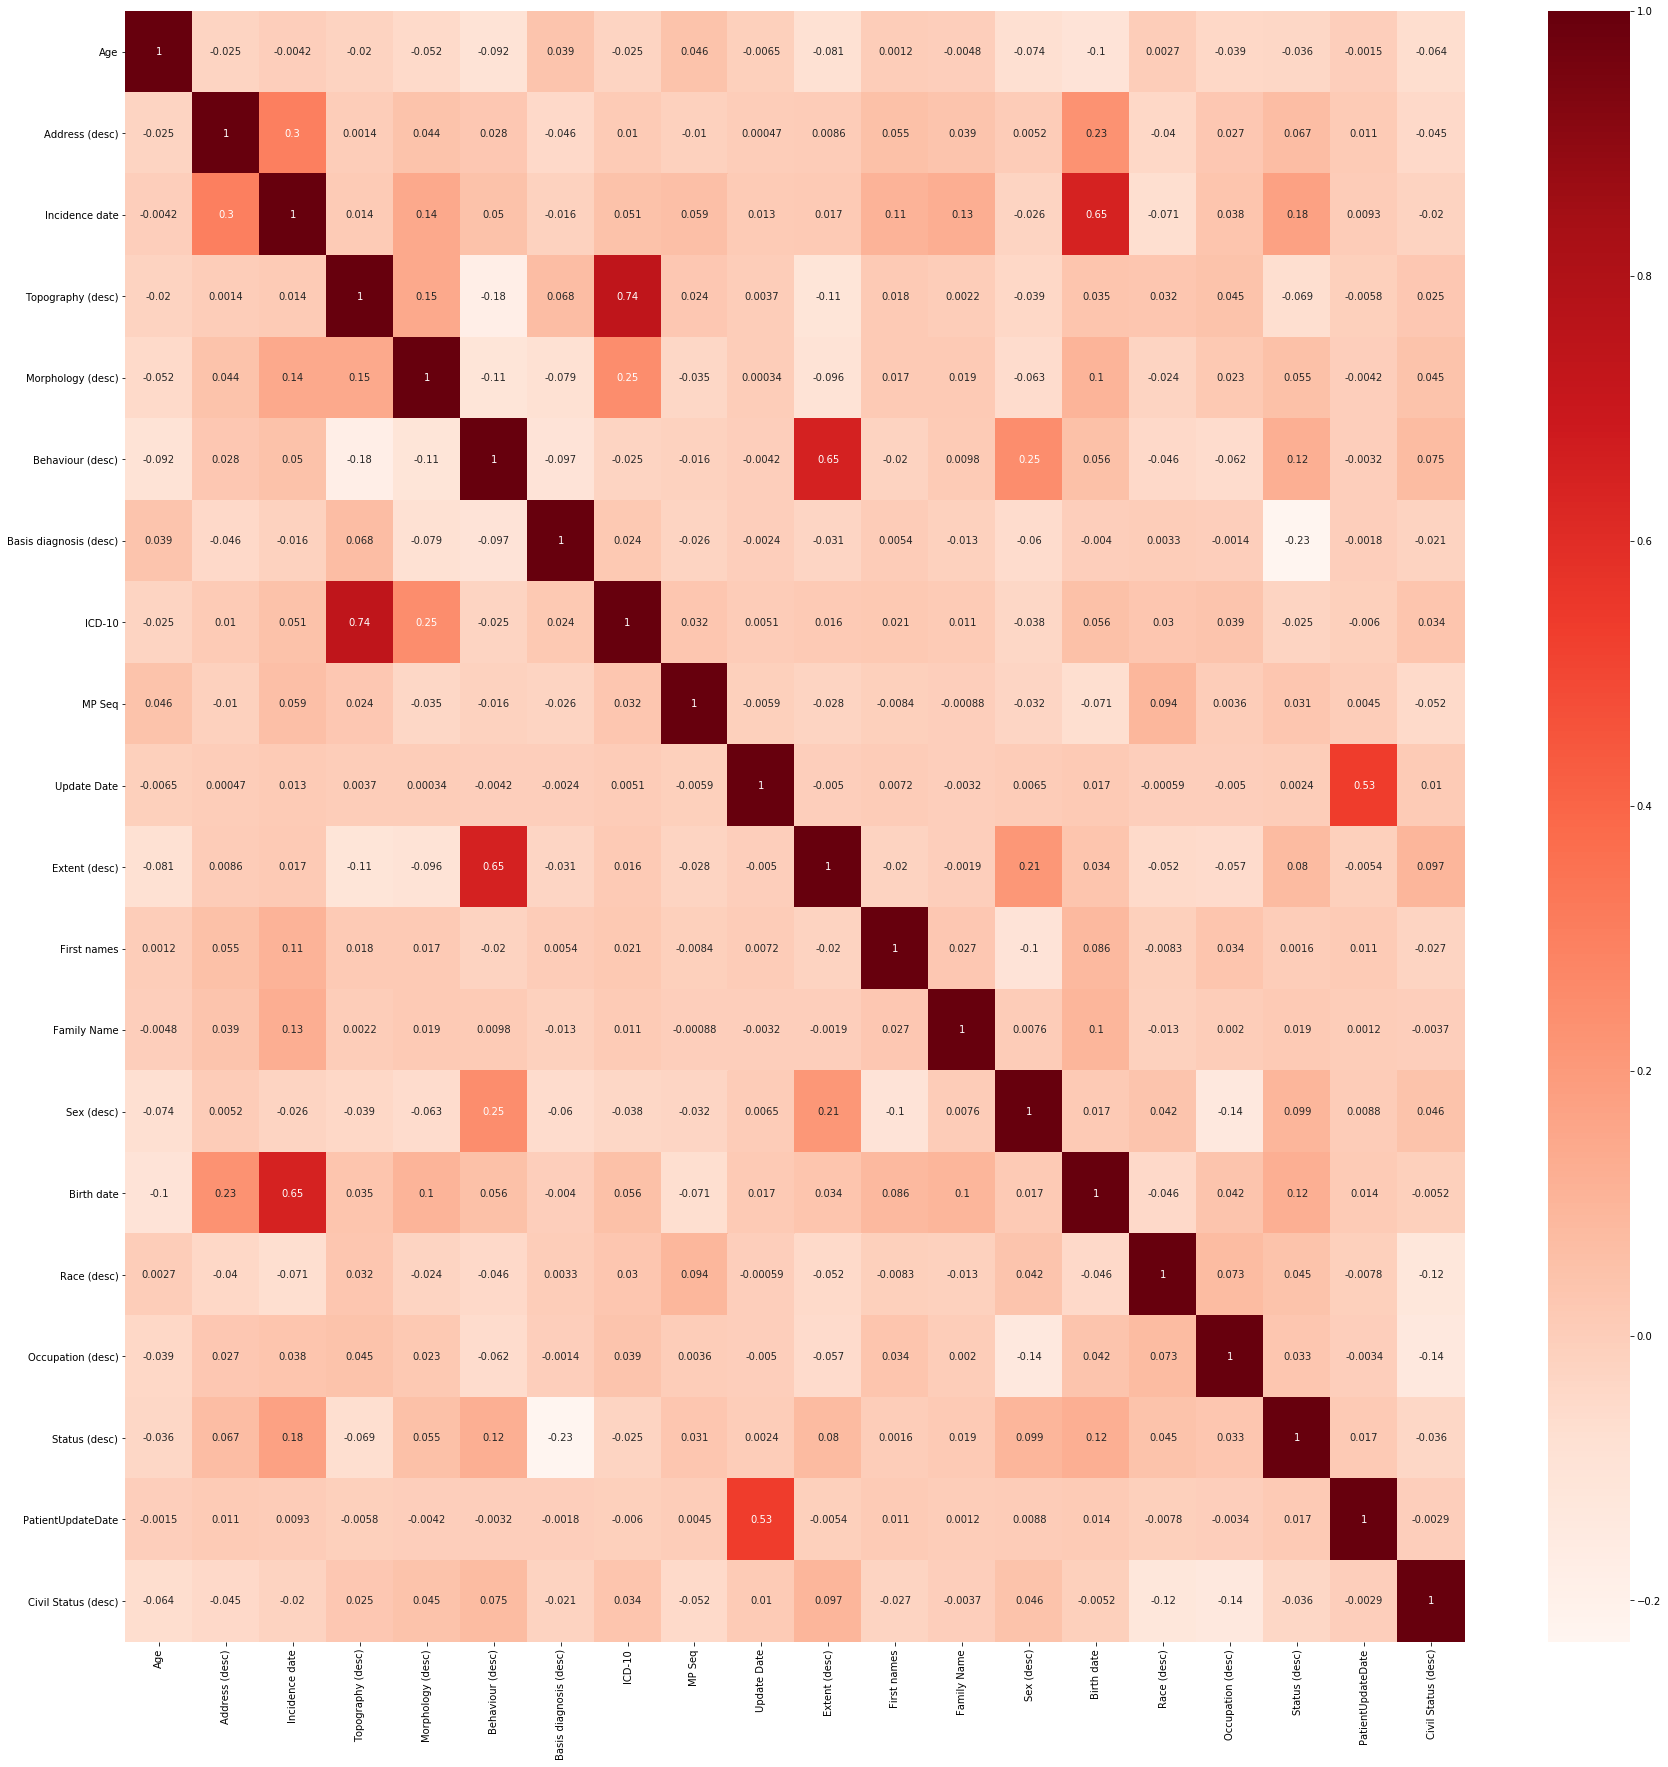

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = final_data.corr()
#print(corr_mat)
plt.figure(figsize=(30,30))
sns.heatmap(corr_mat, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#Columns importance for our target Column
cols = (abs(corr_mat['Extent (desc)'])).sort_values(ascending = False).drop('Extent (desc)')
print(cols)

Behaviour (desc)          0.652798
Sex (desc)                0.213944
Topography (desc)         0.108212
Civil Status (desc)       0.096976
Morphology (desc)         0.095749
Age                       0.081472
Status (desc)             0.080355
Occupation (desc)         0.056886
Race (desc)               0.051771
Birth date                0.034162
Basis diagnosis (desc)    0.030578
MP Seq                    0.028368
First names               0.019968
Incidence date            0.016506
ICD-10                    0.016362
Address (desc)            0.008561
PatientUpdateDate         0.005443
Update Date               0.005025
Family Name               0.001899
Name: Extent (desc), dtype: float64


In [17]:
#We will use only top 5 columns as features for the Extent Prediction
X= final_data[cols.index[:5]]
y= final_data['Extent (desc)']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = [LogisticRegression(),SVC(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier(),
          RandomForestClassifier(),XGBClassifier()]
classifiers = ["LR","SVM", "KNN","MLP","DecisionTree","RandomForest","XGB"]
scores = []

In [20]:
import warnings
warnings.simplefilter("ignore", UserWarning)

for model in models:
    print(model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of  model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of  model is:  57.07213578500707
Confusion Matrix:
 [[   0  391   20    1    0    0]
 [   0 1978   82    5    6    0]
 [   0  912   46    1    0    0]
 [   0  276    9    1    0    0]
 [   0   95    6    2  396    0]
 [   0   15    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       412
           1       0.54      0.96      0.69      2071
           2       0.28      0.05      0.08       959
           3       0.10      0.00      0.01       286
           4       0.99      0.79      0.88       499
           5       0.00      0.00      0.00        15

    accuracy             

Accuracy of  model is:  68.15181518151815
Confusion Matrix:
 [[ 135  209   59    8    1    0]
 [  42 1903   96   21    9    0]
 [  52  478  423    4    1    1]
 [  14  247   10   15    0    0]
 [   2   81    1    0  415    0]
 [   1    7    6    0    1    0]]
Report:
               precision    recall  f1-score   support

           0       0.55      0.33      0.41       412
           1       0.65      0.92      0.76      2071
           2       0.71      0.44      0.54       959
           3       0.31      0.05      0.09       286
           4       0.97      0.83      0.90       499
           5       0.00      0.00      0.00        15

    accuracy                           0.68      4242
   macro avg       0.53      0.43      0.45      4242
weighted avg       0.67      0.68      0.65      4242


==============***===============


In [21]:
scr=scores[:7]
scr

[57.07213578500707,
 55.940594059405946,
 58.981612446958984,
 65.81801037246582,
 65.98302687411598,
 66.36020744931635,
 68.15181518151815]

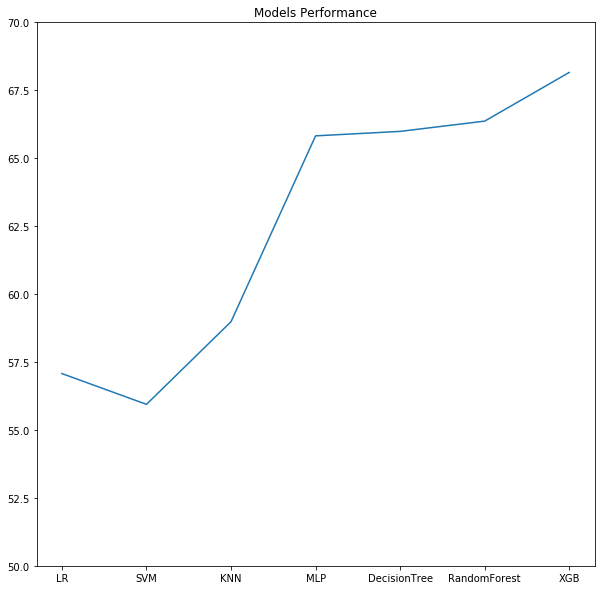

In [22]:
plt.figure(figsize=(10,10))
plt.plot(classifiers,scr)
plt.title("Models Performance")
plt.ylim(50,70)
plt.show()